# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Project 4: Web Scraping Job Postings

## Business Case Overview

You're working as a data scientist for a contracting firm that's rapidly expanding. Now that they have their most valuable employee (you!), they need to leverage data to win more contracts. Your firm offers technology and scientific solutions and wants to be competitive in the hiring market. Your principal has two main objectives:

   1. Determine the industry factors that are most important in predicting the salary amounts for these data.
   2. Determine the factors that distinguish job categories and titles from each other. For example, can required skills accurately predict job title?

To limit the scope, your principal has suggested that you *focus on data-related job postings*, e.g. data scientist, data analyst, research scientist, business intelligence, and any others you might think of. You may also want to decrease the scope by *limiting your search to a single region.*

Hint: Aggregators like [Indeed.com](https://www.indeed.com) regularly pool job postings from a variety of markets and industries. 

**Goal:** Scrape your own data from a job aggregation tool like Indeed.com in order to collect the data to best answer these two questions.

---

## Directions

In this project you will be leveraging a variety of skills. The first will be to use the web-scraping and/or API techniques you've learned to collect data on data jobs from Indeed.com or another aggregator. Once you have collected and cleaned the data, you will use it to answer the two questions described above.

### QUESTION 1: Factors that impact salary

To predict salary you will be building either a classification or regression model, using features like the location, title, and summary of the job. If framing this as a regression problem, you will be estimating the listed salary amounts. You may instead choose to frame this as a classification problem, in which case you will create labels from these salaries (high vs. low salary, for example) according to thresholds (such as median salary).

You have learned a variety of new skills and models that may be useful for this problem:
- NLP
- Unsupervised learning and dimensionality reduction techniques (PCA, clustering)
- Ensemble methods and decision tree models
- SVM models

Whatever you decide to use, the most important thing is to justify your choices and interpret your results. *Communication of your process is key.* Note that most listings **DO NOT** come with salary information. You'll need to able to extrapolate or predict the expected salaries for these listings.



### BONUS PROBLEM

Your boss would rather tell a client incorrectly that they would get a lower salary job than tell a client incorrectly that they would get a high salary job. Adjust one of your models to ease his mind, and explain what it is doing and any tradeoffs. Plot the ROC curve.

---

## Requirements

1. Scrape and prepare your own data.

2. **Create and compare at least two models for each section**. One of the two models should be a decision tree or ensemble model. The other can be a classifier or regression of your choosing (e.g. Ridge, logistic regression, KNN, SVM, etc).
   - Section 1: Job Salary Trends
   - Section 2: Job Category Factors

3. Prepare a polished Jupyter Notebook with your analysis for a peer audience of data scientists. 
   - Make sure to clearly describe and label each section.
   - Comment on your code so that others could, in theory, replicate your work.

4. A brief writeup in an executive summary, written for a non-technical audience.
   - Writeups should be at least 500-1000 words, defining any technical terms, explaining your approach, as well as any risks and limitations.

#### BONUS

5. Answer the salary discussion by using your model to explain the tradeoffs between detecting high vs low salary positions.

6. Convert your executive summary into a public blog post of at least 500 words, in which you document your approach in a tutorial for other aspiring data scientists. Link to this in your notebook.

---

## Suggestions for Getting Started

1. Collect data from [Indeed.com](www.indeed.com) (or another aggregator) on data-related jobs to use in predicting salary trends for your analysis.
  - Select and parse data from *at least 1000 postings* for jobs, potentially from multiple location searches.
2. Find out what factors most directly impact salaries (e.g. title, location, department, etc).
  - Test, validate, and describe your models. What factors predict salary category? How do your models perform?
3. Discover which features have the greatest importance when determining a low vs. high paying job.
  - Your Boss is interested in what overall features hold the greatest significance.
  - HR is interested in which SKILLS and KEY WORDS hold the greatest significance.   
4. Author an executive summary that details the highlights of your analysis for a non-technical audience.
5. If tackling the bonus question, try framing the salary problem as a classification problem detecting low vs. high salary positions.

---

## Useful Resources

- Scraping is one of the most fun, useful and interesting skills out there. Don’t lose out by copying someone else's code!
- [Here is some advice on how to write for a non-technical audience](http://programmers.stackexchange.com/questions/11523/explaining-technical-things-to-non-technical-people)
- [Documentation for BeautifulSoup can be found here](http://www.crummy.com/software/BeautifulSoup/).

---

### Project Feedback + Evaluation

For all projects, students will be evaluated on a simple 3 point scale (0, 1, or 2). Instructors will use this rubric when scoring student performance on each of the core project **requirements:** 

Score | Expectations
----- | ------------
**0** | _Does not meet expectations. Try again._
**1** | _Meets expectations. Good job._
**2** | _Surpasses expectations. Brilliant!_

[For more information on how we grade our DSI projects, see our project grading walkthrough.](https://git.generalassemb.ly/dsi-projects/readme/blob/master/README.md)


In [ ]:
from bs4 import BeautifulSoup
import urllib #use request if throws ERROR 403
from selenium import webdriver
from time import sleep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

In [218]:
jobs = pd.read_csv('./salary_df_car_fut.csv')

In [219]:
jobs.head()

,Unnamed: 0,Company,Title,Address,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
0,0,SKILLSFUTURE SINGAPORE AGENCY,"Executive, (Quality Management Division) (6-mo...","ONE MARINA BOULEVARD, 1 MARINA BOULEVARD 018989",Contract,NONE,Public / Civil Service,NONE,Roles & ResponsibilitiesResponsibilities\r\n\r...,NONE
1,1,HP PPS ASIA PACIFIC PTE. LTD.,Business Analyst,1 DEPOT CLOSE 109841,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...
2,2,SHOPEE SINGAPORE PRIVATE LIMITED,Software Engineer,"GALAXIS, 1 FUSIONOPOLIS PLACE 138522","Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...
3,3,PRICEWATERHOUSECOOPERS CONSULTING (SINGAPORE) ...,Data Analytics –Manager,"MARINA ONE EAST TOWER, 7 STRAITS VIEW 018936","Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...
4,4,Company Undisclosed,Research Fellow,NONE,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...


In [220]:
jobs.Title.value_counts()

NONE                                                                                             158
Business Analyst                                                                                  72
Data Scientist                                                                                    33
Data Analyst                                                                                      25
Data Engineer                                                                                     19
Senior Business Analyst                                                                           18
SAS Development Lead                                                                              16
Software Engineer                                                                                  9
BAU Analyst and Support                                                                            9
Research Fellow                                                                            

In [221]:
jobs.shape

(1627, 10)

In [222]:
jobs.Responsibility[1]

"Roles & ResponsibilitiesHP is the world\xe2\x80\x99s leading personal systems and printing company, we create technology that makes life better for everyone, everywhere. Our innovation springs from a team of individuals, each collaborating and contributing their own perspectives, knowledge, and experience to advance the way the world works and lives. We are looking for visionaries, like you, who are ready to make a purposeful impact on the way the world works.  At HP, the future is yours to create! If you are our Business Analyst in Singapore, you will have a chance to   Provide Analysis to support business/team's needs by ensuring data integrity & accuracy Be the interface to Sales Operations Be the interface to External Analyst: Canalys & IDC. Establish & enable quarterly published reports Drive regular & scheduled review of analysis with team & cross team members Update Market share quarterly & provide Insights (Small and Medium Business = SMB segment with PC & Print) Support team 

In [223]:
jobs.Requirements[1]

'RequirementsEducation and Experience Required:   Prior experience in either finance or sales operation with category experience a strong plus Must possess strong analytical skills, with keen eye for details Possess business flair, with good understanding of IT PC & Print & concepts of sell-in, sell- through & sell-out; channel landscape, etc Must have strong excel, pivot skills and excellence in dealing with numbers (for data accuracy & integrity) Strong organizational skills Strong collaborative skills with cross team members Multinational company experience a plus  \xc2\xa0 HP is a Human Capital Partner \xe2\x80\x93 we commit to human capital development and adopting progressive workplace practices in Singapore.\xc2\xa0'

In [224]:
jobs = jobs.apply(lambda x : x.replace('NONE',np.nan))

In [225]:
jobs.drop(['Address','Unnamed: 0'],axis =1,inplace=True)

In [226]:
jobs.dropna(inplace=True)

In [227]:
jobs.drop('Company',axis = 1, inplace= True)

In [228]:
jobs.head()

,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements
1,Business Analyst,"Permanent, Full Time",Professional,Others,"$8,400to$12,900",Roles & ResponsibilitiesHP is the world’s lead...,RequirementsEducation and Experience Required:...
2,Software Engineer,"Permanent, Full Time",Executive,Information Technology,"$4,400to$8,000",Roles & ResponsibilitiesResponsibilities: De...,RequirementsRequirements: Minimum B.S. degre...
3,Data Analytics –Manager,"Permanent, Contract, Full Time",Manager,Consulting,"$6,200to$9,500",Roles & Responsibilities Advisory - Consulting...,Requirements A good Degree in a quantitative ...
4,Research Fellow,"Contract, Full Time","Professional, Executive",Others,"$4,000to$5,000",Roles & ResponsibilitiesData Scientist / Progr...,Requirements Doctorate degree in a relevant fi...
6,"Application Support Analyst, Reference Data Team",Full Time,Executive,Information Technology,"$6,000to$12,000",Roles & ResponsibilitiesWe are seeking an Appl...,RequirementsQualifications 7-10 years Product...


In [229]:
#sort the seniority to a few features
#sort the Emp_type to a few features
#sort the Industry to a few features
jobs.Seniority.value_counts()

Professional                                                               291
Executive                                                                  248
Manager                                                                    183
Senior Executive                                                           142
Middle Management                                                           70
Senior Management                                                           48
Non-executive                                                               47
Fresh/entry level                                                           37
Junior Executive                                                            35
Professional, Executive                                                     33
Professional, Senior Executive                                              19
Executive, Senior Executive                                                 17
Manager, Senior Executive                           

In [230]:
jobs.Salary= jobs.Salary.apply(lambda x: x.replace('$',''))

In [231]:
jobs.Salary= jobs.Salary.apply(lambda x: x.replace(',',''))

In [232]:
jobs['Salary_mean'] = jobs.Salary.apply(lambda x:(x.split('to')))

In [233]:
jobs['Salary_lower'] = jobs['Salary_mean'].apply(lambda x: float(x[0]))

In [234]:
jobs['Salary_upper'] = jobs['Salary_mean'].apply(lambda x: float(x[1]))

In [340]:
jobs['Salary_mean'] = (jobs['Salary_lower'] + jobs['Salary_upper'] )/2

In [341]:
jobs.head()

,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,Salary_mean,Salary_lower,Salary_upper,comb_text
0,Business Analyst,"Permanent, Full Time",Professional,Others,8400to12900,HP is the world’s leading personal systems and...,Education and Experience Required: Prior exp...,10650.0,8400.0,12900.0,business analyst permanent full time professio...
1,Software Engineer,"Permanent, Full Time",Executive,Information Technology,4400to8000,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,6200.0,4400.0,8000.0,software engineer permanent full time executiv...
2,Data Analytics –Manager,"Permanent, Contract, Full Time",Manager,Consulting,6200to9500,Advisory - Consulting PwC Consulting is a re...,A good Degree in a quantitative discipline (...,7850.0,6200.0,9500.0,data analytics manager permanent contract full...
3,Research Fellow,"Contract, Full Time","Professional, Executive",Others,4000to5000,Data Scientist / Programmer for Regional ATM M...,Doctorate degree in a relevant field. At leas...,4500.0,4000.0,5000.0,research fellow contract full time professiona...
4,"Application Support Analyst, Reference Data Team",Full Time,Executive,Information Technology,6000to12000,We are seeking an Application Support Analyst ...,Qualifications 7-10 years Production support ...,9000.0,6000.0,12000.0,application support analyst reference data tea...


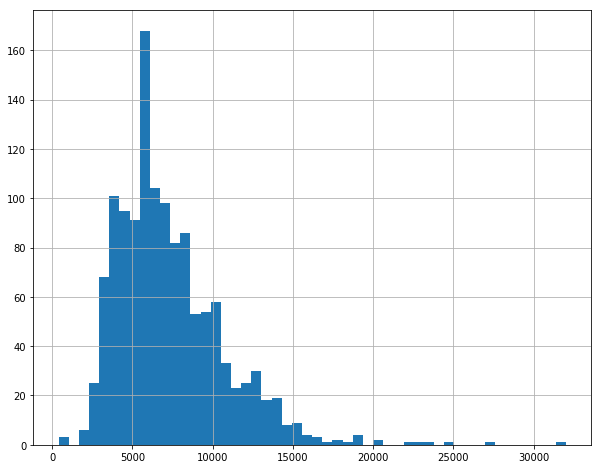

In [348]:

jobs['Salary_mean'].hist(bins = 50, figsize = (10,8))
# there are annual incomes and monthly incomes

In [343]:
# to change annual to montly
jobs['Salary_mean'] = jobs['Salary_mean'].map(lambda x: x/12 if x>50000 else x)
    

In [344]:
jobs[jobs['Salary_mean'] < 2000]

,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,Salary_mean,Salary_lower,Salary_upper,comb_text
606,Intern Commercial Functions Team Asia Pacific,Internship,Fresh/entry level,"Accounting / Auditing / Taxation, Human Resour...",800to800,Intern Commercial Functions Team Asia Pacific ...,Your profile • You are a permanent resident (P...,800.0,800.0,800.0,intern commercial functions team asia pacific ...
849,HUMAN RESOURCE AND ADMINISTRATION,Full Time,Junior Executive,Admin / Secretarial,1500to2000,The Human Resource Personnel will be the Front...,"~ Man the front desk, answering calls and atte...",1750.0,1500.0,2000.0,human resource and administration full time ju...
1020,Business Analyst Intern,Internship,Fresh/entry level,Logistics / Supply Chain,800to800,COMPANY DESCRIPTION CEVA provides world clas...,Who we are looking for: Currently pursuing Di...,800.0,800.0,800.0,business analyst intern internship fresh entry...
1165,Back-End Web Development Intern,Internship,Non-executive,Information Technology,300to500,We are an early stage start-up which uses emer...,Skills and Qualifications Strong knowledge of...,400.0,300.0,500.0,back end web development intern internship non...


In [345]:
jobs.reset_index(inplace = True)

In [346]:
jobs.drop('index',axis =1 ,inplace=True)

In [347]:
jobs.drop(jobs.index[1278],inplace=True)

In [257]:
jobs

,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,Salary_mean,Salary_lower,Salary_upper,comb_text
0,Business Analyst,"Permanent, Full Time",Professional,Others,8400to12900,HP is the world’s leading personal systems and...,Education and Experience Required: Prior exp...,10650.000000,8400.0,12900.0,"Business Analyst Permanent, Full Time Professi..."
1,Software Engineer,"Permanent, Full Time",Executive,Information Technology,4400to8000,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,6200.000000,4400.0,8000.0,"Software Engineer Permanent, Full Time Executi..."
2,Data Analytics –Manager,"Permanent, Contract, Full Time",Manager,Consulting,6200to9500,Advisory - Consulting PwC Consulting is a re...,A good Degree in a quantitative discipline (...,7850.000000,6200.0,9500.0,"Data Analytics –Manager Permanent, Contract, F..."
3,Research Fellow,"Contract, Full Time","Professional, Executive",Others,4000to5000,Data Scientist / Programmer for Regional ATM M...,Doctorate degree in a relevant field. At leas...,4500.000000,4000.0,5000.0,"Research Fellow Contract, Full Time Profession..."
4,"Application Support Analyst, Reference Data Team",Full Time,Executive,Information Technology,6000to12000,We are seeking an Application Support Analyst ...,Qualifications 7-10 years Production support ...,9000.000000,6000.0,12000.0,"Application Support Analyst, Reference Data Te..."
5,CyberSecurity Business Resiliency Analyst and ...,Full Time,Executive,Information Technology,7500to15000,Working in Cybersecurity takes pure passion fo...,"• Bachelors’ degree in computer science, infor...",11250.000000,7500.0,15000.0,CyberSecurity Business Resiliency Analyst and ...
6,Software Engineer (Ref 21711),"Contract, Full Time",Executive,Information Technology,2500to5000,- Research and development suite of multimedia...,- Degree in Computer Science/Information Techn...,3750.000000,2500.0,5000.0,"Software Engineer (Ref 21711) Contract, Full T..."
7,Murex Technical Migration Consultant,Permanent,"Middle Management, Professional",Information Technology,4000to7000,FinSurge is undertaking a major multi-year Mur...,Must Have: Hands on experience in migration ...,5500.000000,4000.0,7000.0,Murex Technical Migration Consultant Permanent...
8,Analytics Director,Permanent,Senior Management,Advertising / Media,90000to130000,"About Essence Essence, part of GroupM, is a gl...",A bit about yourself: Degree from a top-tier...,9166.666667,90000.0,130000.0,Analytics Director Permanent Senior Management...
9,Senior Business Analyst,Permanent,Senior Executive,"Consulting , Banking and Finance, General Mana...",4000to4500,"Develop & present Business models, business c...","Experience, knowledge and interest in Financi...",4250.000000,4000.0,4500.0,Senior Business Analyst Permanent Senior Execu...


In [256]:
jobs.Responsibility = jobs.Responsibility.apply(lambda x:x[24:])

In [243]:
jobs.Requirements = jobs.Requirements.apply(lambda x:x[12:])

In [258]:
jobs['comb_text']= jobs.Title+" "+ jobs.Emp_type+" "+ jobs.Seniority+" "+ jobs.Industry+" "+  jobs.Responsibility+" "+  jobs.Requirements

In [259]:
jobs.comb_text[0]

"Business Analyst Permanent, Full Time Professional Others HP is the world\xe2\x80\x99s leading personal systems and printing company, we create technology that makes life better for everyone, everywhere. Our innovation springs from a team of individuals, each collaborating and contributing their own perspectives, knowledge, and experience to advance the way the world works and lives. We are looking for visionaries, like you, who are ready to make a purposeful impact on the way the world works.  At HP, the future is yours to create! If you are our Business Analyst in Singapore, you will have a chance to   Provide Analysis to support business/team's needs by ensuring data integrity & accuracy Be the interface to Sales Operations Be the interface to External Analyst: Canalys & IDC. Establish & enable quarterly published reports Drive regular & scheduled review of analysis with team & cross team members Update Market share quarterly & provide Insights (Small and Medium Business = SMB segm

In [495]:
#remove punctuations and lower text
import string
# df["job_text"] = df["job_text"].map(lambda x: x.translate(None, string.punctuation).lower())
import re
jobs["comb_text"] = jobs["comb_text"].map(lambda x: re.sub('[^ a-zA-Z0-9]', ' ', x).lower()) #replace weird char with space + lower case
jobs["comb_text"] = jobs["comb_text"].map(lambda x: " ".join(x.split())) #remove additional spaces
X = pd.DataFrame(jobs["comb_text"].values)
y = jobs['Salary_mean']



In [496]:
X.reset_index(inplace=True)

In [497]:
X.columns = ['index','text']

In [498]:
# X.drop('index',axis =1 , inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 2 columns):
index    1280 non-null int64
text     1280 non-null object
dtypes: int64(1), object(1)
memory usage: 20.1+ KB


In [499]:
X = X['text']

In [500]:
import nltk
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [501]:
X = X.apply(lemmatize_text)
X = X.apply(lambda x: " ".join(x) )

In [502]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [503]:


from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

pipe = Pipeline([
    ('vect', CountVectorizer(max_features=150000, strip_accents='unicode', stop_words='english', ngram_range=(1,3), max_df=0.9, min_df=1)),
    ('tfidf', TfidfTransformer()),
    ('reg', LinearRegression())

]) 
#cross validate
scores = cross_val_score(pipe, X_train, y_train, cv=10)
print scores
round(np.mean(scores),3), round(np.std(scores),3)

[0.26881107 0.17888162 0.14321358 0.18268712 0.55971768 0.15024274
 0.31069146 0.45427375 0.39786442 0.33478615]


(0.298, 0.134)

In [465]:
# jobs['Salary_mean'] =np.log(jobs['Salary_mean'])

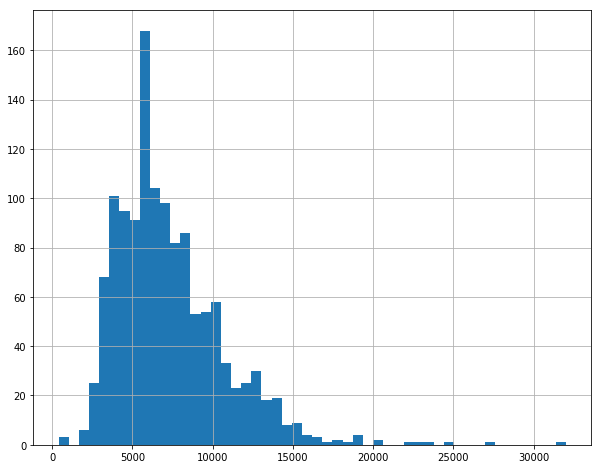

In [466]:
jobs['Salary_mean'].hist(bins = 50, figsize = (10,8))
# visualize the log transformed salary dataset.
# the results improved from 0.1 to 0.321. 


In [467]:
#spilt the salary to 3 classes, low,med,high

np.percentile(y, [20, 75])

array([4500., 9000.])

In [504]:
y = y.apply(lambda x: 0 if x < 4500 else 2 if x > 9000 else 1)


In [550]:
# X_train_lem = X_train.apply(lemmatize_text)
# X_train_lem = X_train_lem.apply(lambda x: " ".join(x) )
# X_train_lem.values

# X_test_lem = X_test.apply(lemmatize_text)
# X_test_lem = X_test_lem.apply(lambda x: " ".join(x) )
# X_test_lem.values

from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('vect', CountVectorizer(max_features=100000, strip_accents='unicode', stop_words='english', ngram_range=(1,3), max_df=0.9, min_df=1)),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression())

]) 
#cross validate
scores = cross_val_score(pipe, X_train, y_train, cv=10)
print scores
round(np.mean(scores),3), round(np.std(scores),3)



[0.62790698 0.61627907 0.60465116 0.63953488 0.63953488 0.61627907
 0.60465116 0.62790698 0.61176471 0.58333333]


(0.617, 0.016)

### QUESTION 2: Factors that distinguish job category

Using the job postings you scraped for part 1 (or potentially new job postings from a second round of scraping), identify features in the data related to job postings that can distinguish job titles from each other. There are a variety of interesting ways you can frame the target variable, for example:
- What components of a job posting distinguish data scientists from other data jobs?
- What features are important for distinguishing junior vs. senior positions?
- Do the requirements for titles vary significantly with industry (e.g. healthcare vs. government)?

You may end up making multiple classification models to tackle different questions. Be sure to clearly explain your hypotheses and framing, any feature engineering, and what your target variables are. The type of classification model you choose is up to you. Be sure to interpret your results and evaluate your models' performance.


In [561]:
jobs['comb_text_1']=  jobs.Emp_type+" "+ jobs.Seniority+" "+ jobs.Industry+" "+  jobs.Responsibility+" "+  jobs.Requirements

In [577]:
jobs

,Title,Emp_type,Seniority,Industry,Salary,Responsibility,Requirements,Salary_mean,Salary_lower,Salary_upper,comb_text,comb_text_1
0,Business Analyst,"Permanent, Full Time",Professional,Others,8400to12900,HP is the world’s leading personal systems and...,Education and Experience Required: Prior exp...,10650.000000,8400.0,12900.0,business analyst permanent full time professio...,"Permanent, Full Time Professional Others HP is..."
1,Software Engineer,"Permanent, Full Time",Executive,Information Technology,4400to8000,Responsibilities: Develop and enhance data i...,Requirements: Minimum B.S. degree in Compute...,6200.000000,4400.0,8000.0,software engineer permanent full time executiv...,"Permanent, Full Time Executive Information Tec..."
2,Data Analytics –Manager,"Permanent, Contract, Full Time",Manager,Consulting,6200to9500,Advisory - Consulting PwC Consulting is a re...,A good Degree in a quantitative discipline (...,7850.000000,6200.0,9500.0,data analytics manager permanent contract full...,"Permanent, Contract, Full Time Manager Consult..."
3,Research Fellow,"Contract, Full Time","Professional, Executive",Others,4000to5000,Data Scientist / Programmer for Regional ATM M...,Doctorate degree in a relevant field. At leas...,4500.000000,4000.0,5000.0,research fellow contract full time professiona...,"Contract, Full Time Professional, Executive Ot..."
4,"Application Support Analyst, Reference Data Team",Full Time,Executive,Information Technology,6000to12000,We are seeking an Application Support Analyst ...,Qualifications 7-10 years Production support ...,9000.000000,6000.0,12000.0,application support analyst reference data tea...,Full Time Executive Information Technology We ...
5,CyberSecurity Business Resiliency Analyst and ...,Full Time,Executive,Information Technology,7500to15000,Working in Cybersecurity takes pure passion fo...,"• Bachelors’ degree in computer science, infor...",11250.000000,7500.0,15000.0,cybersecurity business resiliency analyst and ...,Full Time Executive Information Technology Wor...
6,Software Engineer (Ref 21711),"Contract, Full Time",Executive,Information Technology,2500to5000,- Research and development suite of multimedia...,- Degree in Computer Science/Information Techn...,3750.000000,2500.0,5000.0,software engineer ref 21711 contract full time...,"Contract, Full Time Executive Information Tech..."
7,Murex Technical Migration Consultant,Permanent,"Middle Management, Professional",Information Technology,4000to7000,FinSurge is undertaking a major multi-year Mur...,Must Have: Hands on experience in migration ...,5500.000000,4000.0,7000.0,murex technical migration consultant permanent...,"Permanent Middle Management, Professional Info..."
8,Analytics Director,Permanent,Senior Management,Advertising / Media,90000to130000,"About Essence Essence, part of GroupM, is a gl...",A bit about yourself: Degree from a top-tier...,9166.666667,90000.0,130000.0,analytics director permanent senior management...,Permanent Senior Management Advertising / Medi...
9,Senior Business Analyst,Permanent,Senior Executive,"Consulting , Banking and Finance, General Mana...",4000to4500,"Develop & present Business models, business c...","Experience, knowledge and interest in Financi...",4250.000000,4000.0,4500.0,senior business analyst permanent senior execu...,"Permanent Senior Executive Consulting , Bankin..."


In [679]:
y_title = jobs.Title.apply(lambda x:1 if 'Data Scientist' in x else 0)


In [680]:
jobs["Requirements"] = jobs["Requirements"].map(lambda x: re.sub('[^ a-zA-Z0-9]', ' ', x).lower()) #replace weird char with space + lower case
jobs["Requirements"] = jobs["Requirements"].map(lambda x: " ".join(x.split())) #remove additional spaces
X_title = pd.DataFrame(jobs["Requirements"].values)

In [681]:
X_title.reset_index(inplace=True)
X_title.columns = ['index','text']
X_title = X_title['text']

In [682]:
X_title = X_title.apply(lemmatize_text)
X_title = X_title.apply(lambda x: " ".join(x) )

In [683]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('vect', CountVectorizer(max_features=100000, strip_accents='unicode', stop_words='english', ngram_range=(1,3), max_df=0.9, min_df=1)),
    ('tfidf', TfidfTransformer()),
    ('logreg', LogisticRegression())

]) 
#cross validate
scores = cross_val_score(pipe, X_train_title, y_train_title, cv=10)
print scores
round(np.mean(scores),3), round(np.std(scores),3)

[0.93103448 0.94186047 0.94186047 0.94186047 0.94186047 0.94186047
 0.94117647 0.94117647 0.94117647 0.94117647]


(0.941, 0.003)

In [684]:
cvec = CountVectorizer(max_features=50000, strip_accents='unicode', stop_words='english', ngram_range=(1,3), max_df=0.9, min_df=1)

In [685]:
X_title = cvec.fit_transform(X_title) 


In [686]:
features = cvec.get_feature_names()
X_title = X_title.todense()
X_title = pd.DataFrame(X_title, columns = features)

 'Random Forrest's Accuracy: 0.95


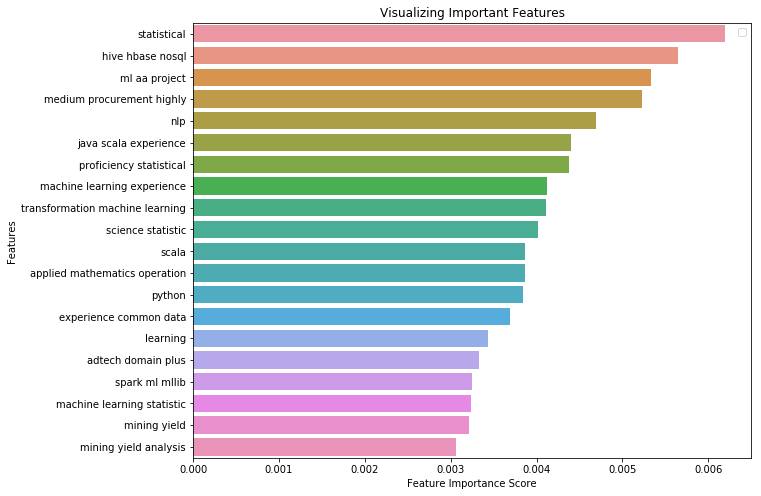

In [689]:

# Use random forest as they deal well with imbalanced classes# Use ra 
#Define my X and y
X = X_title
y = y_title

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# We have to scale the predictors by Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print " 'Random Forrest's Accuracy:",metrics.accuracy_score(y_test, y_pred)

#Check out the most important predictors
feature_imp = pd.Series(classifier.feature_importances_,index= X.columns).sort_values(ascending=False)
feature_imp.head(20)

# Creating a bar plot for top 20 features
plt.figure(figsize = (10,8))
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()



In [595]:
jobs.Seniority.value_counts()

Professional                                                               291
Executive                                                                  247
Manager                                                                    183
Senior Executive                                                           142
Middle Management                                                           70
Senior Management                                                           48
Non-executive                                                               47
Fresh/entry level                                                           37
Junior Executive                                                            34
Professional, Executive                                                     33
Professional, Senior Executive                                              19
Executive, Senior Executive                                                 17
Manager, Senior Executive                           

In [ ]:
Senior = ['Senior','Manager']
Junior = ['Junior','Fresh']
y_seniority = jobs.Seniority.apply(lambda x: 2 if any(y in x for y in Senior) else 0 if any(y in x for y in Junior)else 1 )

 'Random Forrest's Accuracy: 0.603125


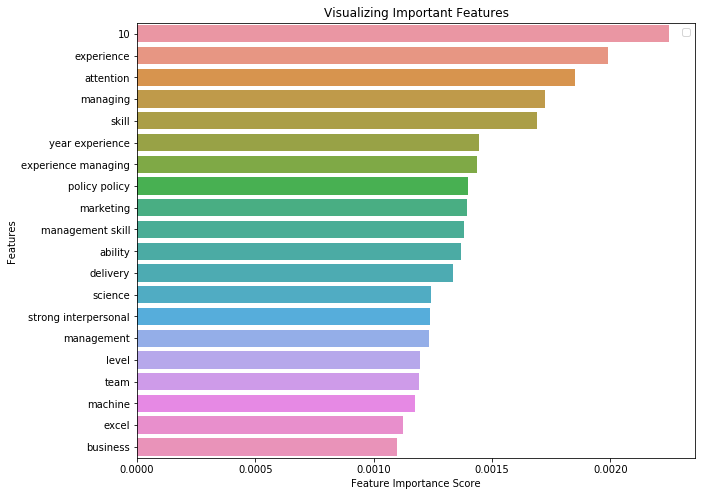

In [714]:
X = X_title
y = y_seniority

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# We have to scale the predictors by Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print " 'Random Forrest's Accuracy:",metrics.accuracy_score(y_test, y_pred)

#Check out the most important predictors
feature_imp = pd.Series(classifier.feature_importances_,index= X.columns).sort_values(ascending=False)
feature_imp.head(20)

# Creating a bar plot for top 20 features
plt.figure(figsize = (10,8))
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [716]:
feature_imp.head()

10            0.002246
experience    0.001989
attention     0.001849
managing      0.001724
skill         0.001691
dtype: float64

In [726]:
jobs.iloc[8]['Requirements']

'a bit about yourself degree from a top tier college 3 0 gpa or equivalent preferably numerical experience working in a data based role experience managing a team and ability to delegate effectively proficiency with systems such as sql social analytics tools crimson hexagon python and r expose to measurement of both direct response and brand awareness campaigns excellent at presenting data in a visually engaging and insightful manner that cuts through the noise strong organizational and project management skills strong understanding of what data points can be collected and analyzed in a digital campaign and how each data point should be analyzed established and professional communication presentation and motivational skills what you can expect from essence essence s mission is to make advertising more valuable to the world we do this by employing the world s very best talent to solve some of the toughest challenges of today s digital marketing landscape it s important that we hire peop

In [593]:
jobs.Industry.value_counts()

Information Technology                                                                                     443
Banking and Finance                                                                                        169
Sciences / Laboratory / R&D                                                                                 73
Engineering                                                                                                 65
Others                                                                                                      56
Marketing / Public Relations                                                                                54
Consulting                                                                                                  52
Advertising / Media                                                                                         44
Banking and Finance, Information Technology                                                                 33
H

In [ ]:
# since there are too many different industries, i just chose focus on the key requirements for healthcare.

In [706]:
for x in jobs.Industry:
    if 'Healthcare' in x:
        print x

Healthcare / Pharmaceutical, General Management
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical, Information Technology
Healthcare / Pharmaceutical, Marketing / Public Relations 
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical
Healthcare / Pharmaceutical, General Management
Advertising / Media , Healthcare / Pharmaceutical
Healthcare / Pharmaceutical, Medical / Therapy Services
Healthcare / Pharmaceutical


In [702]:
y_industry_healthcare = jobs.Title.apply(lambda x:1 if 'Healthcare' in x else 0)

 'Random Forrest's Accuracy: 0.990625


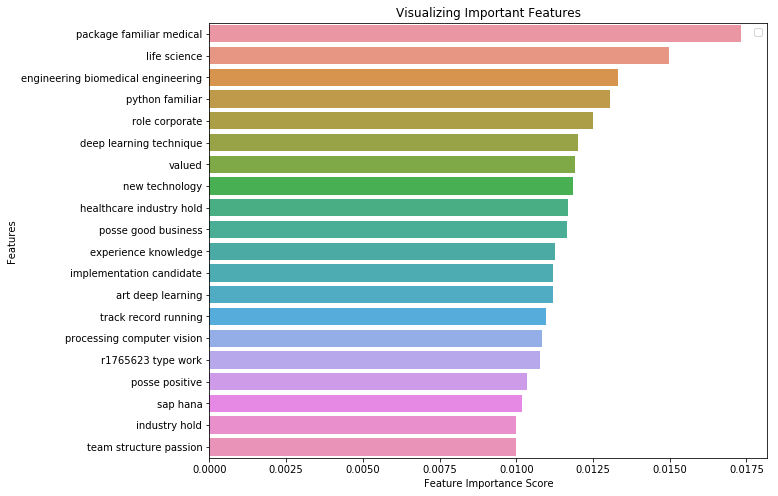

In [712]:
X = X_title
y = y_industry_healthcare

# Creating the Training and Test set from data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

# We have to scale the predictors by Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print " 'Random Forrest's Accuracy:",metrics.accuracy_score(y_test, y_pred)

#Check out the most important predictors
feature_imp = pd.Series(classifier.feature_importances_,index= X.columns).sort_values(ascending=False)
feature_imp.head(20)

# Creating a bar plot for top 20 features
plt.figure(figsize = (10,8))
sns.barplot(x=feature_imp.head(20), y=feature_imp.head(20).index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()